In [82]:
import re
import os
import math
import spacy
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI

In [83]:
# global variables
tf = {}
nlp = spacy.load('hin-dep-parser-treebank')

In [152]:
article = input("Enter the article name")

Enter the article name12851.txt


In [106]:
# extracting sentences from a given file
def getSent(articleName, directory):
    articleName = directory + '/' + articleName
    f = open(articleName).read()
    sentences = f.split('।')
    return sentences

In [86]:
# cleaning sentences (basic regex for now)
def cleanSent(unclean):
    clean = []
    for sent in unclean:
        sent = re.sub('\\n', '', sent)
        sent = re.sub('[a-zA-z]', '', sent)
        sent = sent.strip()
        if len(sent) != 0:
            clean.append(sent)
    return clean

In [87]:
# calculating tf of all words
def prepTF(clean, docs):
    global tf
    for sent in clean:
        doc = nlp(sent)
        for w in doc:
            if (w.lemma_, docs) in tf:
                tf[(w.lemma_, docs)] += 1
            else:
                tf[(w.lemma_, docs)] = 1
    return 

In [88]:
# repeating process for each article to get tf 
def eachArticle(directory):
    documents = os.listdir(directory)
    sorted(documents)
    x = 0
    for doc in documents:
        unclean = getSent(doc, directory)
        clean = cleanSent(unclean)
        if len(clean) > 100:
            x += 1
            print(doc + " " + str(x))
            prepTF(clean, doc)
    print(x)
    return

In [89]:
eachArticle('valid')

9656.txt 1
4854.txt 2
87999.txt 3
122713.txt 4
1754.txt 5
71874.txt 6
126224.txt 7
131517.txt 8
171238.txt 9
85202.txt 10
34813.txt 11
81119.txt 12
14562.txt 13
34736.txt 14
110983.txt 15
34836.txt 16
12851.txt 17
415.txt 18
40804.txt 19
74032.txt 20
8873.txt 21
145277.txt 22
39411.txt 23
19437.txt 24
113442.txt 25
83111.txt 26
171233.txt 27
155120.txt 28
89660.txt 29
46497.txt 30
47440.txt 31
145224.txt 32
9249.txt 33
116231.txt 34
74485.txt 35
105144.txt 36
3900.txt 37
155913.txt 38
101183.txt 39
16869.txt 40
100613.txt 41
100757.txt 42
88593.txt 43
51401.txt 44
26379.txt 45
165253.txt 46
121012.txt 47
103938.txt 48
49190.txt 49
168772.txt 50
76353.txt 51
100063.txt 52
99184.txt 53
82425.txt 54
9296.txt 55
63529.txt 56
103532.txt 57
147631.txt 58
71914.txt 59
160251.txt 60
76876.txt 61
158675.txt 62
104479.txt 63
57242.txt 64
90355.txt 65
23255.txt 66
105085.txt 67
73374.txt 68
31901.txt 69
133924.txt 70
119091.txt 71
29914.txt 72
36781.txt 73
4190.txt 74
73471.txt 75
29229.txt 76
13

139454.txt 581
39062.txt 582
104656.txt 583
85198.txt 584
46249.txt 585
73706.txt 586
5660.txt 587
119874.txt 588
158135.txt 589
66017.txt 590
71800.txt 591
170053.txt 592
11240.txt 593
141698.txt 594
67203.txt 595
146849.txt 596
40095.txt 597
405.txt 598
113398.txt 599
24870.txt 600
89026.txt 601
158125.txt 602
159143.txt 603
51036.txt 604
87775.txt 605
119322.txt 606
112685.txt 607
27150.txt 608
4922.txt 609
126705.txt 610
154389.txt 611
116619.txt 612
153758.txt 613
116324.txt 614
171916.txt 615
112225.txt 616
148694.txt 617
104773.txt 618
73124.txt 619
95893.txt 620
38141.txt 621
101717.txt 622
145754.txt 623
106760.txt 624
70816.txt 625
83657.txt 626
165464.txt 627
125372.txt 628
141620.txt 629
159091.txt 630
17080.txt 631
125562.txt 632
83576.txt 633
20014.txt 634
25933.txt 635
37981.txt 636
28687.txt 637
2002.txt 638
165556.txt 639
60768.txt 640
168840.txt 641
40816.txt 642
162733.txt 643
121022.txt 644
128632.txt 645
56222.txt 646
151514.txt 647
8666.txt 648
131949.txt 649
6959

In [153]:
# calculating tfidf for a particular article
def oneArticle(articleName, directory):
    global tf
    # print(tf)
    df = {}
    unclean = getSent(articleName, directory)
    clean = cleanSent(unclean)
    documents = os.listdir(directory)    
    if articleName not in documents:
        prepTF(clean, articleName)
    for sent in clean:
        doc = nlp(sent)
        for w in doc:
            if w.lemma_ in df:
                continue
            for docs in documents:
                if (w.lemma_, docs) in tf:
                    if w.lemma_ in df:
                        df[w.lemma_] += 1
                    else:
                        df[w.lemma_] = 1            
    idf = {}
    for word in df:
        if word not in idf:
            idf[word] = math.log(len(documents)/(df[word] + 1))
    
    tfidf = {}
    for word in idf:
        if word not in tfidf:
            tfidf[word] = tf[(word, articleName)] * idf[word]
    
    return tfidf

In [154]:
tfidf = oneArticle(article, 'valid')

In [155]:
print(tfidf)

{'आर्यभट': 420.7609063192841, 'प्राचीन': 29.65786844796505, 'भारत': 43.27629147403803, 'के': 663.692945507549, 'एक': 152.8513979174075, 'महान': 4.657478255836693, 'ज्योतिषविद्': 9.061144065614055, 'और': 264.15850647261993, 'गणितज्ञ': 20.94510757180266, 'थे': 61.19036358667893, 'इन्होंने': 29.01523763796287, 'आर्यभटीय': 147.14654227760016, 'ग्रंथ': 42.5877955786455, 'की': 305.785231438033, 'रचना': 4.520512400763535, 'जिसमें': 7.406758480845198, 'ज्योतिषशास्त्र': 16.73599377010822, 'अनेक': 19.976947361483603, 'सिद्धांतों': 5.282652452810432, 'का': 222.3293060616836, 'प्रतिपादन': 6.1707723077178915, 'है': 430.9954579290114, 'इसी': 7.392673915594372, 'में': 489.95133673593926, 'अपना': 7.620360790898979, 'जन्मस्थान': 7.269384596386001, 'कुसुमपुर': 34.622715830023566, 'जन्मकाल': 8.144853333739901, 'शक': 6.213331922136687, 'संवत्': 6.597290825023888, '398': 9.061144065614055, 'लिखा': 30.572536621468494, 'बिहार': 5.832317909892687, 'वर्तमान': 8.1448272138117, 'पटना': 13.32649758563137, 'नाम': 

In [156]:
# final summary according to highest tfidf of sentences
def getSummary(articleName, directory, tfidf):
    unclean = getSent(articleName, directory)
    clean = cleanSent(unclean)
    heading = clean[0].split(' ')
    slicelen = slice(1, len(clean))
    text = clean[slicelen]
    size = round(0.3 * len(text))
    sent_tfidf = {}
    for sentI in range(0, len(text)):
        w1 = 0
        w2 = 0
        w3 = 0
        sent = text[sentI]
        doc = nlp(sent)
        stfidf = 0
        for w in doc:
            if w.lemma_ not in STOP_WORDS_HI:
                stfidf += tfidf[w.lemma_]
                if w.text in heading:
                    w1 += 5
                if w.tag_ == 'NNP':
                    w2 += 3
                if str(w.tag_)[0] == 'N':
                    w3 += 2
                    
        sent_tfidf[sentI] = stfidf/len(doc) + w1 + w2 + w3
    sent_tfidf = sorted(sent_tfidf.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
    sent_limit = []
    for i in range(0, size):
        sent_limit.append(sent_tfidf[i])
    sent_limit = sorted(sent_limit)
    print(sent_limit)
    summary = ""
    actual = ""
    for i in sent_limit:
        summary += text[i[0]] + " । " 
    for i in range(0, len(clean)):
        actual += clean[i] + " । "
    summary = clean[0] + " । " + summary
    return actual, summary

In [157]:
actual, summary = getSummary(article, 'valid', tfidf)
print(actual)
print("\n")
print(summary)

[(2, 87.46305464675135), (7, 128.56445597865772), (8, 103.36654306075343), (19, 138.32746609716634), (24, 108.12283870442035), (27, 85.8097971527553), (28, 97.05392280380006), (29, 84.91035158303296), (30, 93.0932913930557), (31, 160.81627624468115), (39, 86.58730375493847), (41, 89.34274573638072), (53, 95.42612727023136), (56, 101.49508558070924), (60, 80.43565126717307), (61, 102.35175836252495), (62, 79.13307797640758), (65, 84.75148322506512), (68, 81.73357869915493), (72, 103.26786661558342), (75, 104.77256257176903), (83, 102.2280528712684), (86, 104.60775247183042), (91, 97.46059594159425), (92, 81.171929406746), (93, 175.5293665209617), (95, 85.85468260436491), (100, 99.6684114573565), (101, 78.63530336659531), (103, 81.58706212892045), (109, 101.58331994669987), (113, 78.12436709718233), (114, 91.83257395742751), (115, 112.94889949251204), (122, 78.63437078573821), (123, 122.0656060345945), (126, 119.25616478731087), (128, 104.42067124817041), (129, 87.22089432696244), (130, 

In [158]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

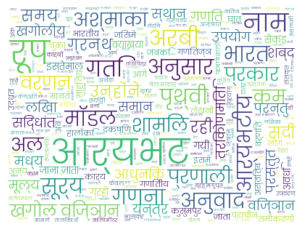

In [159]:
font= "Poppins-Light.ttf"
summary = re.sub("।", '', summary)
wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    regexp=r"[\u0900-\u097F]+", 
    font_path=font
).generate(summary)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()